<div style="padding: 20px;
            color: #fff;
            margin: 10px auto;
            font-size: 28px;
            text-align: center;
            display: block;
            border-radius: 10px;
            border-width: 2px;
            border-style: solid;
            border-color: #fff;
            background-color: #00802b;
            box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);
            transition: 0.3s;
            font-weight: bold;
            max-width: 80%;">📒📈 Mastering Linear Regression with Statsmodels</div>

<h3><div style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 18px;
            font-weight: bold;">Table of Contents</div></h3>

- [📝 Introduction](#intro)<br><br>
- [🧐 What is Linear Regression?](#LinReg)<br><br>
- [📑 Assumptions for Linear Regression](#conditions)<br><br>
- [⚙️ Modeling](#model)<br><br>
- [✍🏻 Conclusion](#conclusion)<br><br>
- [📚 Further Reading...](#sources)

<h1 id = 'intro' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">📝 Introduction</h1>

<p style="font-size: 22px;
          font-family: Monaco">Linear Regression is one of the most essential techniques used in Data Science and Machine Learning to <mark><b>predict</b></mark> the value of a certain variable based on the value of another variable.</p>
<p style="font-size: 22px;
          font-family: Monaco">The goal of this notebook is to explore in-depth how Linear Regression works and the math behind it, explaining the relationship between dependent variable and independent variables and the main <mark><b>conditions</b></mark> for a successful Linear Regression.</p>
<p style="font-size: 22px;
          font-family: Monaco">For this notebook, we are going to use Sklearn's <b>diabetes dataset</b>, which is particularly useful for regression tasks.</p>
<p style="font-size: 22px;
          font-family: Monaco">We start this notebook by loading all the necessary libraries.</p>

In [1]:
# Loading libraries

# Basic libraries 
import pandas as pd
import numpy as np

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Diabetes dataset
from sklearn.datasets import load_diabetes

# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Metric for evaluation
from sklearn.metrics import mean_squared_error

# Statsmodels for Linear Regression
import statsmodels.api as sm

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

<h1 id = 'LinReg' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">🧐 What is Linear Regression?</h1>

<p style="font-size: 22px;
          font-family: Monaco">Linear Regression is a statistical method widely used in various fields, including economics, biology, engineering, and many more for <mark><b>predictive modeling</b></mark> and <mark><b>hypothesis testing</b></mark>.</p>
<p style="font-size: 22px;
          font-family: Monaco">It is based on modeling the <mark><b>relationship</b></mark> between and dependent variable and one or more independent variable by fitting a linear equation to the observed data. The primary objective of a linear regression is finding the <mark><b>best-fitting line</b></mark> that can accurately predict the output of the dependent variable given the values of the independent variable(s).</p>
<p style="font-size: 22px;
          font-family: Monaco">The line is given by the following equation:</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">
\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \ldots + \epsilon
\end{equation}
</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">Where:</p>
<p style="font-size: 22px;
          font-family: Monaco">$Y$ is the dependent variable.</p>
<p style="font-size: 22px;
          font-family: Monaco">$\beta_0$ is the intercept.</p>
<p style="font-size: 22px;
          font-family: Monaco">$\beta_1$, $\beta_2$, $\beta_3$, $\ldots$ are the coefficients for each independent variable.</p>
<p style="font-size: 22px;
          font-family: Monaco">$X_1$, $X_2$, $X_3$, $\ldots$ represent each one independent variable.</p>
<p style="font-size: 22px;
          font-family: Monaco">$\epsilon$ is the error term, which captures the <mark><b>random noise</b></mark> in the dependent variable. It is the <mark><b>stochastic</b></mark> component.</p>
<p style="font-size: 22px;
          font-family: Monaco">In this equation, each component serves a specific purpose. The $Intercept(\beta_0)$, for instance, is the <mark><b>constant term</b></mark> that represents the value of $Y$ (the dependent variable) when all the independent variables $X_1$, $X_2$, $\ldots$  are equal to <mark><b>zero</b></mark>. It locates the line up or down the y-axis on the <b>Cartesian coordinate system</b>, as you can see in the image below.</p>
<center>
    <img src = "https://www.mathplanet.com/Oldsite/media/27468/coordinateplane06.png">
<p style = "font-size: 16px;
            font-family:Monaco;
            text-align: center;
            margin-top: 10px;">When $X$ = $0$, $Y$ = $\beta_0$</p>
</center>
<p style="font-size: 22px;
          font-family: Monaco">In the case of <mark><b>one single</b></mark> independent variable, the intercept is calculated as the following:</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">
\begin{equation}
\beta_0 = \bar{Y} - \beta \bar{X}
\end{equation}
</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">Where:</p>
<p style="font-size: 22px;
          font-family: Monaco">$\bar{Y}$ is the <mark><b>mean</b></mark> value of the dependent variable $Y$.</p>
<p style="font-size: 22px;
          font-family: Monaco">$\bar{X}$ is the <mark><b>mean</b></mark> value of the independent variable $X$.</p>
<p style="font-size: 22px;
          font-family: Monaco">The $Coefficients(\beta_1, \beta_2, \beta_3, \ldots)$ are the values that measure the <mark><b>magnitude of impact</b></mark> of each independent variable on the dependent variable. A one-unit change in $X_1$, for instance, will result in a $\beta_1$ change in $Y$ if all the other $X_s$ are <mark><b>constant</b></mark>.</p>
<p style="font-size: 22px;
          font-family: Monaco">The equation for finding the value of $\beta_1$ in a simple linear regression model with only <mark><b>one single</b></mark> independent variable is given by the following:</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">
\begin{equation}
\beta_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}
\end{equation}
</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">Where:</p>
<p style="font-size: 22px;
          font-family: Monaco">$X_i$ and $Y_i$ represent the $i^{th}$ sample of both $X$ and $Y$.</p>
<p style="font-size: 22px;
          font-family: Monaco">$\bar{X}$ and $\bar{Y}$ represent the mean values for both $X$ and $Y$.</p>
<p style="font-size: 22px;
          font-family: Monaco">$\sum_{i=1}^{n}$ represent the sum starting from the first element of the series up until the $n^{th}$ element of the series.</p>
<p style="font-size: 22px;
          font-family: Monaco">In this equation, the coefficient $\beta_1$ is the result of the ratio of the <mark><b>covariance</b></mark> between $X$ and $Y$, represented by the product of the deviations between each $X$ and $Y$ from their respective means, and the variance of $X$, given by the sum of the squares of the deviations of each $X$ from its mean. The effect of the independent variable on the dependent variable can be summed up as the following:</p>
<p style="font-size: 22px;
          font-family: Monaco"><b>• $\beta_1$ $>$ 0:</b> $Y$ <mark>increases</mark> as $X$ <mark>increases</mark>.</p>
<p style="font-size: 22px;
          font-family: Monaco"><b>• $\beta_1$ $<$ 0:</b> $Y$ <mark>decreases</mark> as $X$ <mark>increases</mark>.</p>
<p style="font-size: 22px;
          font-family: Monaco"><b>• $\beta_1$ = 0:</b> $X$ has <mark>no effect</mark> on $Y$.</p>
<p style="font-size: 22px;
          font-family: Monaco">In the case of a linear regression with <mark><b>multiple</b></mark> independent variables, the coefficients and the intercept are obtained through <mark><b>matrix algebra</b></mark>:</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">
\begin{equation}
\beta = (X^TX)^{-1}X^TY
\end{equation}
</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">Where:</p>
<p style="font-size: 22px;
          font-family: Monaco">$\beta$ is a <mark><b>vector</b></mark> containing the intercept and coefficients.</p>
<p style="font-size: 22px;
          font-family: Monaco">$X$ is a <mark><b>matrix</b></mark> where the first column is all $1_s$ and the other columns each represent a different independent variable.</p>
<p style="font-size: 22px;
          font-family: Monaco">$X^T$ is the <mark><b>transpose</b></mark> of the $X$ matrix.</p>
<p style="font-size: 22px;
          font-family: Monaco">$(X^TX)^{-1}$ is the <mark><b>inverse</b></mark> of the product of the $X$ matrix and its transpose.</p>
<p style="font-size: 22px;
          font-family: Monaco">$Y$ is a <mark><b>vector</b></mark> of values of the dependent variable.</p>
<p style="font-size: 22px;
          font-family: Monaco">The goal of this operation is to obtain estimates of the parameters in the $\beta$ vector, which are the coefficients and the intercept.</p>
<p style="font-size: 22px;
          font-family: Monaco">The linear regression with multiple independent variables can be then given by the following equation:</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">
\begin{equation}
Y = X\beta + \epsilon
\end{equation}
</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">The image below can correctly display the matrix form of the equation above.</p>
<center>
    <img src = "https://miro.medium.com/v2/resize:fit:640/format:webp/1*S-ElAv4JjLSOqM2jDtUtlQ.png">
<p style = "font-size: 16px;
            font-family:Monaco;
            text-align: center;
            margin-top: 10px;">The first column of the $X$ matrix is populated by $1_s$ for the intercept, which is represented by the $\beta_1$ in the $\beta$ vector.</p>
</center>

<p style="font-size: 22px;
          font-family: Monaco">To demonstrate how Linear Regression works, let's load the diabetes dataset and obtain our $X$ and $Y$ values.</p>

In [2]:
# Loading dataset
X, y = load_diabetes(return_X_y=True)

In [3]:
# Creating a DataFrame for the Independent variables
X_df = pd.DataFrame(X, columns = [f'Feature_{i+1}' for i in range(X.shape[1])])
X_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


<p style="font-size: 22px;
          font-family: Monaco">Features from 1 to 10 are our independent variables $X_1$, $X_2$, $\ldots$, $X_{10}$.</p>

In [4]:
# Creating a DataFrame for the Dependent variable
y_df = pd.DataFrame(y, columns = ['Target'])
y_df

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


<p style="font-size: 22px;
          font-family: Monaco">We have above our dependent variable, also called the target variable.</p>

<p style="font-size: 22px;
          font-family: Monaco">We can also combine both dataframes.</p>

In [5]:
df = pd.concat([X_df, y_df], axis = 1) # Concatenating both X and Y dataframes into one single dataframe
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<h1 id = 'conditions' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">📑 Assumptions for Linear Regression</h1>

<p style="font-size: 22px;
          font-family: Monaco">For a linear regression model to be considered significant and efficient, there are some <mark><b>key assumptions</b></mark> that need to be met. These are:</p>
<p style="font-size: 22px;
          font-family: Monaco">$1.$ There must be a <mark>linear relationship</mark> between the independent variable and the dependent variable.</p>
<p style="font-size: 22px;
          font-family: Monaco">$2.$ There should be little to no <mark>multicollinearity</mark> in the data. That is, the independent variables should not be too highly correlated with each other.</p>
<p style="font-size: 22px;
          font-family: Monaco">$3.$ The observations should be <mark>independent</mark> of each other.</p>
<p style="font-size: 22px;
          font-family: Monaco">$4.$ The residuals - errors between the predicted values and the true values - should be <mark>normally distributed</mark>.</p>
<p style="font-size: 22px;
          font-family: Monaco">$5.$ The variance of residuals should be constant across all levels of the dependent variable, this is described as <mark>homoscedasticity</mark>.</p>
<p style="font-size: 22px;
          font-family: Monaco">Failing to meet the assumptions listed above can have many implications, among them is having a model with <mark><b>poor predictive</b></mark> power, unstable coefficient estimates, inaccurate hypothesis tests, and biased errors.</p>

<p style="font-size: 22px;
          font-family: Monaco">We can use Exploratory Data Analysis and data visualization tools to identify whether our data meets the assumptions listed above.</p>
<p style="font-size: 22px;
          font-family: Monaco">We can start by identifying whether there is or isn't a linear relationship between Feature 9 and the Target variable by plotting a scatter plot.</p>

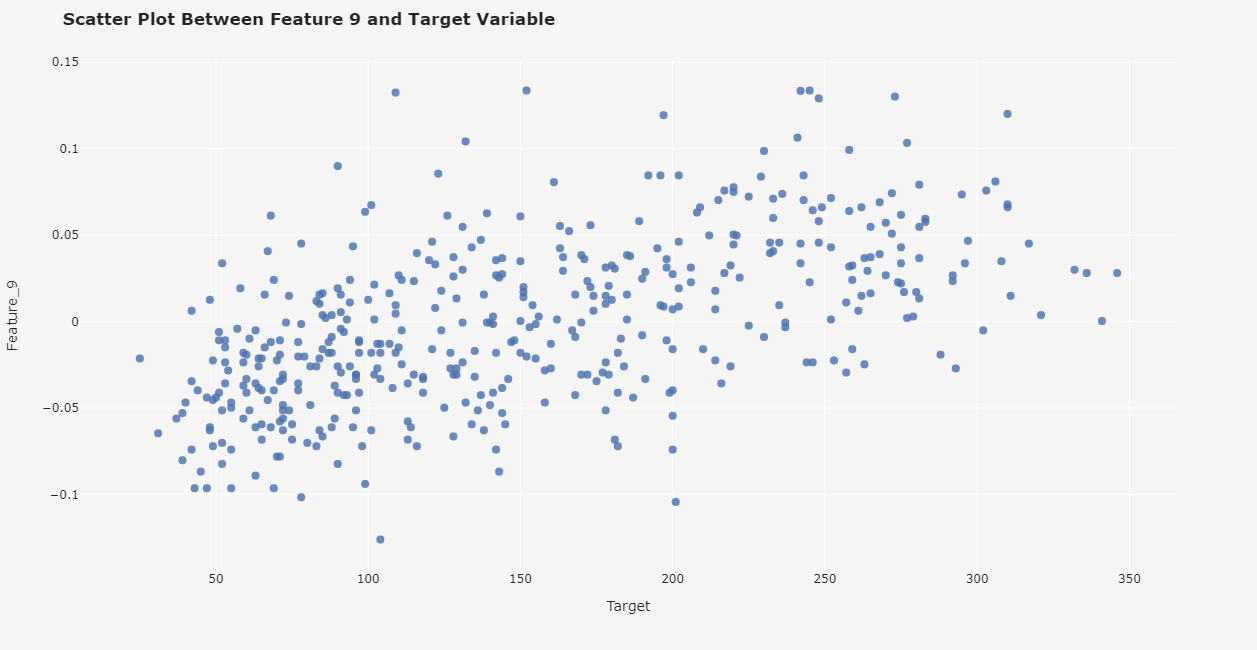

In [6]:
# Setting scatter plot
fig = px.scatter(df, x='Target', y='Feature_9',
                 opacity = 0.825,
                 template= 'seaborn')

fig.update_traces(marker={'size': 8}) # Defining marker size

# Setting layout
fig.update_layout(title= {'text': f'<b>Scatter Plot Between Feature 9 and Target Variable</b>',
                          'x': 0.05, 'xanchor': 'left', 'y': 0.98},
                  showlegend=True,
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=650, width=850)
                
fig.show()

<p style="font-size: 22px;
          font-family: Monaco">We can clearly identify a positive linear relationship between <code>Feature_9</code> and the target variable, as we can see that as values on the X-axis increase, the values on the Y-axis also increase.</p>
<p style="font-size: 22px;
          font-family: Monaco">A similar linear relationship, although negative, can be seen among <code>Feature_7</code> and the target variable, where a decrease in the Y-axis leads to an increase in the X-axis.</p>

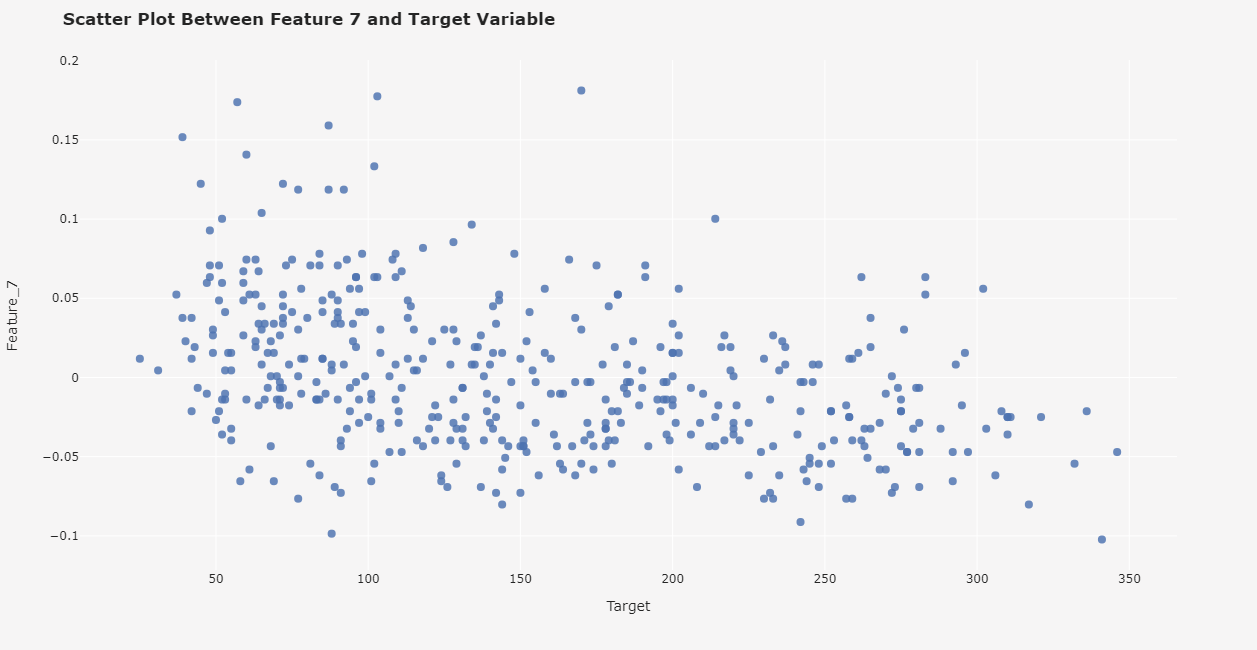

In [7]:
fig = px.scatter(df, x='Target', y='Feature_7',
                 opacity = 0.825,
                 template= 'seaborn')

fig.update_traces(marker={'size': 8})

fig.update_layout(title= {'text': f'<b>Scatter Plot Between Feature 7 and Target Variable</b>',
                          'x': 0.05, 'xanchor': 'left', 'y': 0.98},
                  showlegend=True,
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=650, width=850)
                
fig.show()

<p style="font-size: 22px;
          font-family: Monaco">We can also plot a correlation plot containing Pearson's R values between the target variable and the independent variables.</p>
<p style="font-size: 22px;
          font-family: Monaco">In the plot, values will range from -1 to 1, where -1 indicates a perfect negative relationship and 1 indicates a perfect positive relationship. Values closer to 0 suggest no linear relationship.</p>

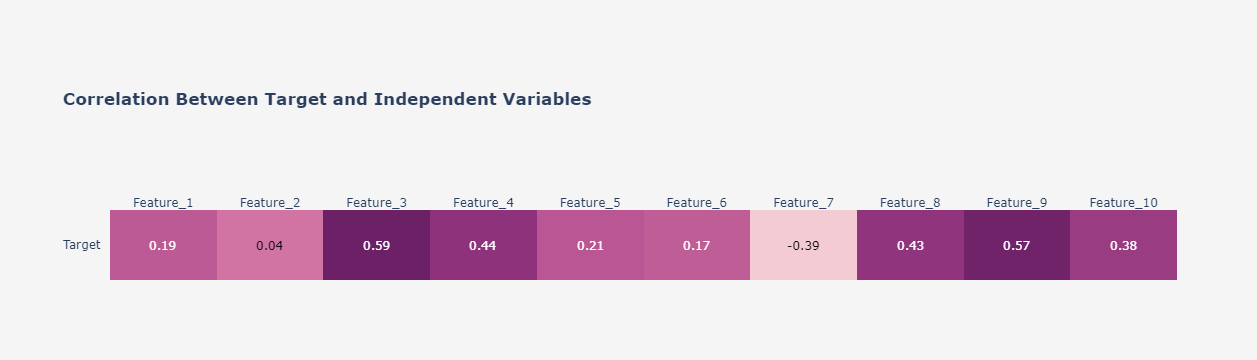

In [34]:
corr = np.round(df.corr(), 2) # Computing correlation
target_corr = corr.loc[['Target'], :].drop(columns=['Target']) # Filtering for the Target variable

# Creating annotated heatmap
fig = ff.create_annotated_heatmap(z=target_corr.values,
                                  x=target_corr.columns.tolist(),
                                  y=['Target'],
                                  colorscale='Magenta')

# Updating layout
fig.update_layout(title={'text': '<b>Correlation Between Target and Independent Variables</b>',
                        'x': 0.05, 'xanchor': 'left'},
                  margin=dict(t=210, l=110),
                  yaxis=dict(showgrid=False),
                  xaxis=dict(showgrid=False),
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=300, width=950) 

# Configuring font size 
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 12

fig.show()

<p style="font-size: 22px;
          font-family: Monaco">We can see that the target variable has the strongest positive linear relationship with <code>Feature_3</code>, the strongest negative linear relationship with <code>Feature_7</code>, and there is possibly no real relationship between the target variable and <code>Feature_2</code>.</p>

<p style="font-size: 22px;
          font-family: Monaco">We can also use correlation plots to check for multicollinearity, to see if there is any strong correlation between the independent variables.</p>

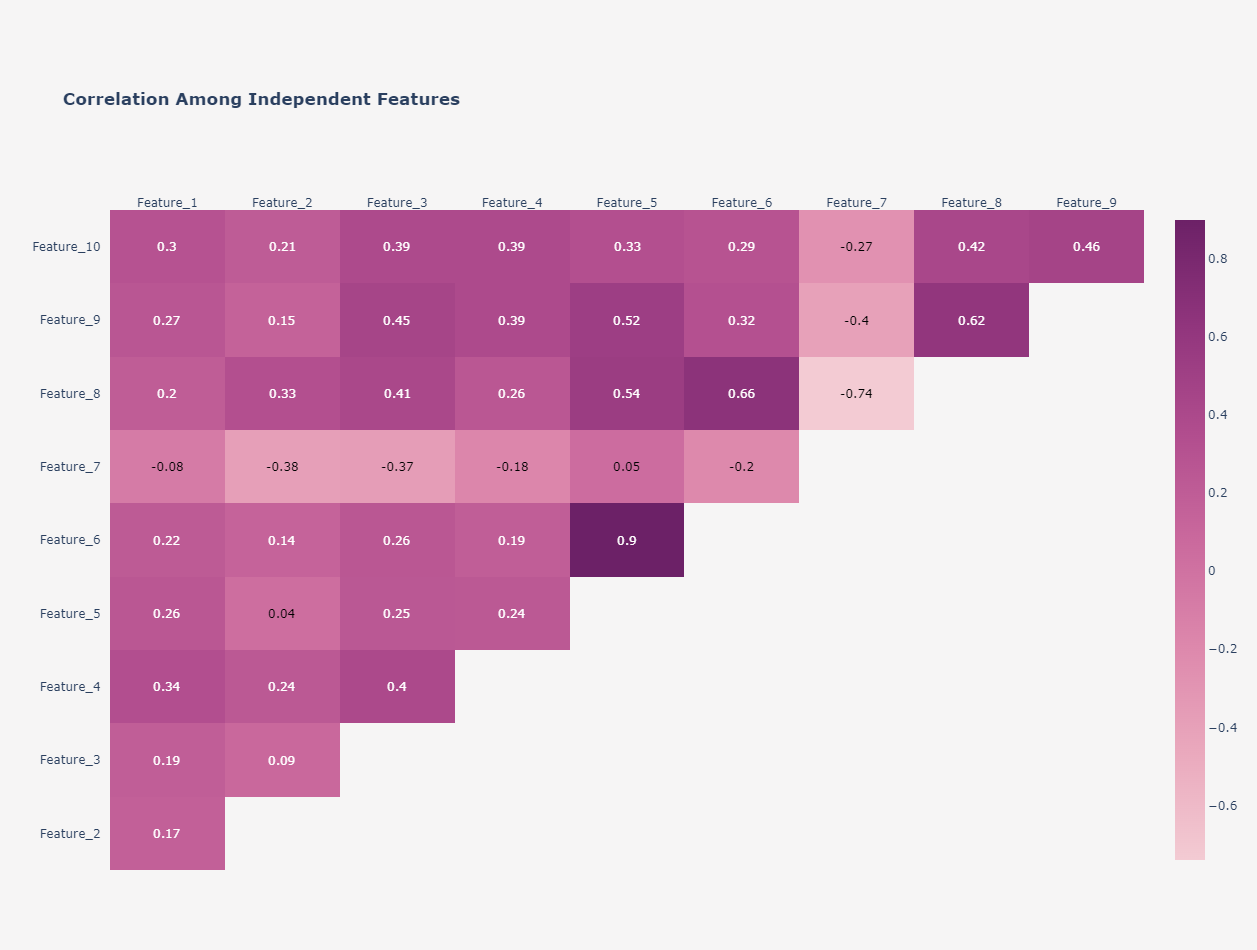

In [9]:
# Measuring correlations
corr = np.round(df.corr(), 2)
corr = corr.drop('Target', axis=0).drop('Target', axis=1) # Removing target variable

# Filtering redundant values
mask = np.triu(np.ones_like(corr, dtype = bool))
c_mask = np.where(~mask, corr, 100)

c = []
for i in c_mask.tolist()[1:]:
    c.append([x for x in i if x != 100])

# Creating annotated heatmap
fig = ff.create_annotated_heatmap(z=c[::-1],
                                  x=corr.index.tolist()[:-1],
                                  y=corr.columns.tolist()[1:][::-1],
                                  colorscale = 'Magenta')

fig.update_layout(title = {'text': '<b>Correlation Among Independent Features</b>',
                           'x': 0.05, 'xanchor': 'left'},
                  margin = dict(t=210, l = 110),
                  yaxis = dict(autorange = 'reversed', showgrid = False),
                  xaxis = dict(showgrid = False),
                  plot_bgcolor = '#F6F5F5',
                  paper_bgcolor = '#F6F5F5',
                  height = 950, width = 950)
                     

fig.add_trace(go.Heatmap(z = c[::-1],
                         colorscale = 'Magenta',
                         showscale = True,
                         visible = False))
fig.data[1].visible = True
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 12

fig.show()

<p style="font-size: 22px;
          font-family: Monaco">It's possible to see a very strong correlation between <code>Feature_6</code> and <code>Feature_5</code>. Let's see how they relate to each other on the scatter plot.</p>

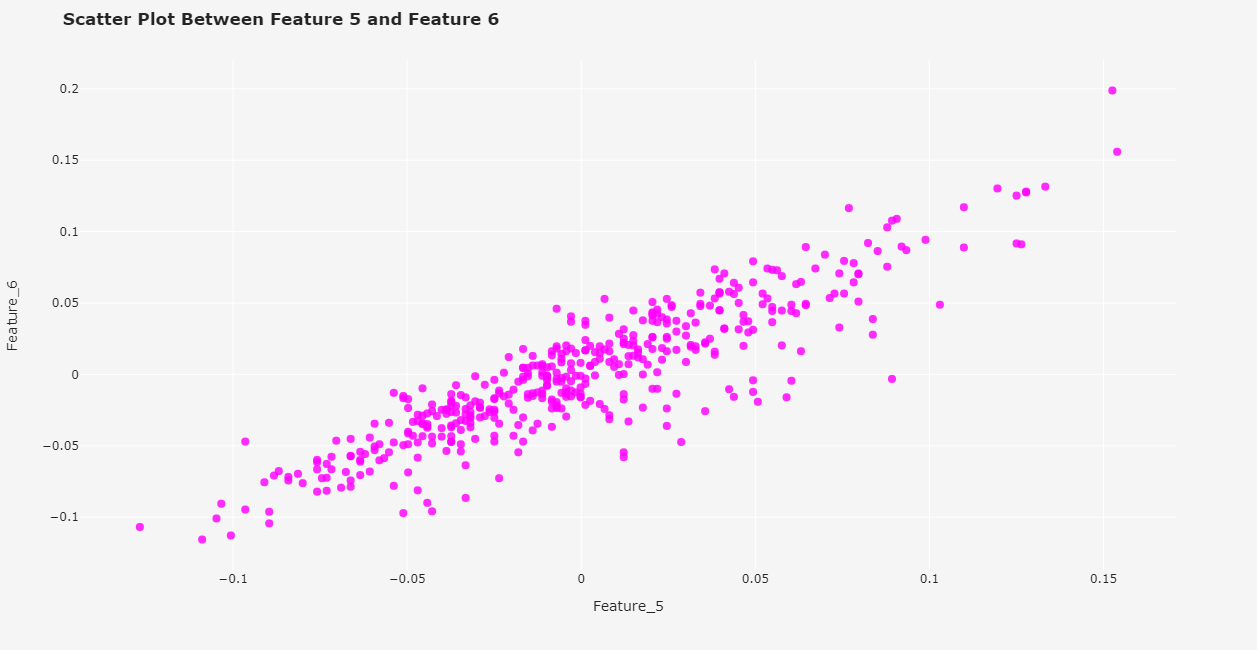

In [10]:
fig = px.scatter(df, x='Feature_5', y='Feature_6',
                 opacity = 0.825,
                 template= 'seaborn')

fig.update_traces(marker={'size': 8,
                         'color': 'magenta'})

fig.update_layout(title= {'text': f'<b>Scatter Plot Between Feature 5 and Feature 6</b>',
                          'x': 0.05, 'xanchor': 'left', 'y': 0.98},
                  showlegend=True,
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=650, width=850)
                
fig.show()

<p style="font-size: 22px;
          font-family: Monaco">We can observe a very strong trend where values increase in both the X and Y axes.</p>

<p style="font-size: 22px;
          font-family: Monaco">With the plots above, we have been able to obtain some valuable insights on the data we are working with. First, we already identified features that have a stronger linear relationship with the target variable. Second, we discovered that there is a high correlation between two distinct independent features, which we are going to address during the modeling phase.</p>

<h1 id = 'model' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">⚙️ Modeling</h1>

<p style="font-size: 22px;
          font-family: Monaco">For the modeling step, we are going to use <code>statsmodel.OLS</code> to fit the linear regression model to the training data. This will also allow us to print a summary describing key metrics for a better understanding on how well the model fits the data.</p>
<p style="font-size: 22px;
          font-family: Monaco">I am also going to use a testing set to predict the values for the dependent variable, and use the <b><i>Root Mean Squared Error</i></b> to evaluate performance. The RMSE is given by the following formula:</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">
\begin{equation}
\text{RMSE} = \sqrt{\frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{n}}
\end{equation}
</p>
<br><br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">Where:</p>
<p style="font-size: 22px;
          font-family: Monaco">$Y_i$ is the true value for $Y$ in the $i^{th}$ sample.</p>
<p style="font-size: 22px;
          font-family: Monaco">$\hat{Y}_i$ is the predicted value for $Y$ in the $i^{th}$ sample.</p>
<p style="font-size: 22px;
          font-family: Monaco">The RMSE is simply the square root of the average of the squared differences between the actual and predicted values. It is expressed in the same units as the target variable, making it very intuitive to comprehend. The closer to 0, the most accurate are the predictions.</p>

<p style="font-size: 22px;
          font-family: Monaco">To start the modeling process, we are going to once more split the dataframe into independent variables $X$ and dependent variable $Y$</p>

In [11]:
X = df.drop('Target', axis = 1) # Selecting independent features
y = df.Target # Selecting target variable

In [12]:
# Visualizing X Features
X

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [13]:
# Visualizing target variable
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Target, Length: 442, dtype: float64

<p style="font-size: 22px;
          font-family: Monaco">We must also split the data into training and testing set, for fitting and evaluating model's performance.</p>

In [14]:
# Creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3, # 30% of data for testing
                                                   shuffle = True, # Shuffling values
                                                   random_state = 42)


<p style="font-size: 22px;
          font-family: Monaco">We are also going to add a constant to the $X$ dataframes. This is basically the first column of $1_s$ we have seen before, used for the intercept, which is the $\beta_1$ in the $\beta$ vector.</p>

In [15]:
# Adding a Constant term for the Intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [16]:
X_train # Visualizing X dataframe with the constant

,const,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
225,1.0,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,1.0,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,1.0,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,1.0,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,1.0,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,1.0,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,1.0,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,1.0,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


<p style="font-size: 22px;
          font-family: Monaco">Now we may fit the model to the data and draw some conclusions by looking at the summary.</p>

In [17]:
# Fitting model
model = sm.OLS(y_train, X_train).fit()
print(model.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     32.86
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.37e-42
Time:                        14:33:09   Log-Likelihood:                -1671.5
No. Observations:                 309   AIC:                             3365.
Df Residuals:                     298   BIC:                             3406.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.0082      3.143     48.050      0.0

<p style="font-size: 22px;
          font-family: Monaco">There are many insights that can be extracted from the summary above. Let's start by observing the features and their coefficients.</p>
<p style="font-size: 22px;
          font-family: Monaco">Remember the linear regression equation:</p>
<br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">
\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \epsilon
\end{equation}
</p>
<br><br><br>
<p style="font-size: 22px;
          font-family: Monaco">The $Intercept(\beta_0)$ is equal to 151.0082. It means that the predicted value of $Y$ will be <mark>151.0082</mark> when <u>all the other features are equal to 0</u>.</p>
<p style="font-size: 22px;
          font-family: Monaco">The $\beta_1$ coefficient is the average change in $Y$ for a one-unit change in $X_1$, which is the <code>Feature_1</code> variable. In this case, a one-unit increase in <code>Feature_1</code> is going to represent an increase of about <mark>29.2540</mark> in the predicted value for $Y$ <u>when all other features are constant</u>.</p>
<p style="font-size: 22px;
          font-family: Monaco">We can also see negative coefficients, which is the case of the coefficient of <code>Feature_5</code>. This suggests that for one-unit increase in this feature we may expect a decrease of about <mark>901.9597</mark> in the predicted value of $Y$, as long as all other features are held constant.</p>
<p style="font-size: 22px;
          font-family: Monaco">We also have in the summary the standard errors $std$ $err$ values. When looking at this metric, we want values to be as low as possible, indicating a more reliable estimate for coefficient values. The $P>|t|$ tells us if the feature is statistically significant or not. We want these values to be <mark><b>below $0.05$</b></mark> to deem a feature statistically significant for predicting the outcome of $Y$.</p>
<p style="font-size: 22px;
          font-family: Monaco">With that in mind, we can notice that the most reliable independent variables were <b><code>Feature_2</code>, <code>Feature_3</code>, <code>Feature_4</code>, and <code>Feature_9</code></b>.</p>
<p style="font-size: 22px;
          font-family: Monaco">We also have other important metrics to look at. The R-Squared metric at 0.524 suggests that me model is able to explain approximately $52.4$% of the variance in the target variable.</p>
<p style="font-size: 22px;
          font-family: Monaco">The <b><i>Durbin-Watson</i></b> statistic is used to detect autocorrelation between the residuals. Values for the $DW$ range between 0 to 4 and, as a rule of thumb, values between 1.5 to 2.5 suggest that there is no autocorrelation between the residuals and our samples are independent of each other. Considering our $DW$ value is equal to 1.764, this ticks one of the key assumptions of Linear Regression.</p>
<p style="font-size: 22px;
          font-family: Monaco">Another relevant metric is the <b><i>Jarque-Bera</i></b> statistic, which tells us whether the residuals are normally-distributed or not. As a rule of thumb, if $JB$ is too far from zero, it indicates that the data is <mark>not-normally distributed</mark>. In this case, a $JB$ equal to 1.417 suggests that our residuals may be normally distributed. The values for the Kurtosis, close to 3.0, and Skew, close to 0, are also relevant metrics to suggest our residuals are indeed normally distributed. This is another positive sign when talking about the assumptions regarding Linear Regression models.</p>
<p style="font-size: 22px;
          font-family: Monaco">To confirm if the residuals are normally-distributed or not, we can use a Histogram plot to visualize how they're distributed.</p>

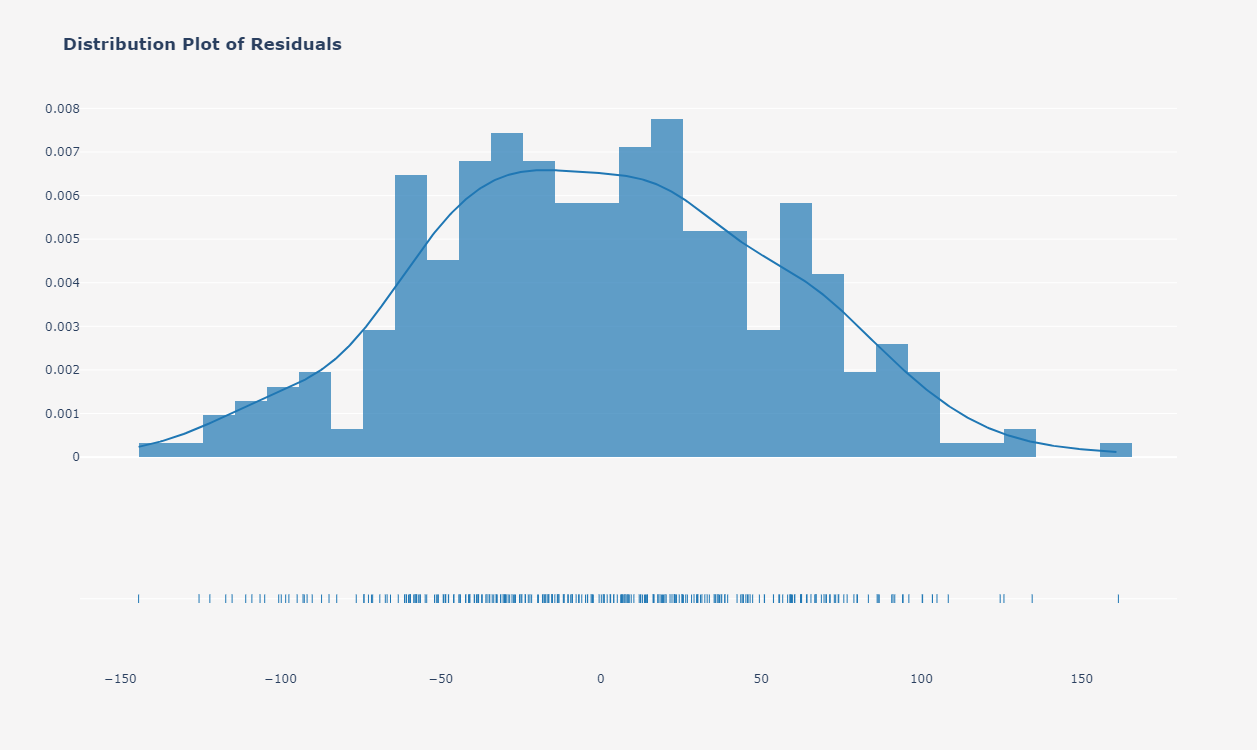

In [18]:
residuals = model.resid # Obtaining residuals

# Creating a distribution plot
fig = ff.create_distplot([residuals], ['Residuals'], bin_size=10)
fig.update_layout(title={'text': '<b>Distribution Plot of Residuals</b>',
                         'x': 0.05, 'xanchor': 'left'},
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=750, width=950,
                  showlegend=False)

fig.show()

<p style="font-size: 22px;
          font-family: Monaco">It's possible to see that the curve do resemble a bell curve, which is a sign of the normal distribution.</p>

<p style="font-size: 22px;
          font-family: Monaco">Other metrics, such as <b><i>Log-Likelihood</i></b>, <b><i>AIC</i></b>, and <b><i>BIC</i></b> are only relevant when comparing two different models to each other. We will approach them later on.</p>
<p style="font-size: 22px;
          font-family: Monaco">Let's move forward and predict values for our dependent variable $Y$ in the testing set.</p>

In [19]:
y_pred = model.predict(X_test) # Running predictions
rmse = mean_squared_error(y_test, y_pred,squared = False) # Computing RMSE

print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 53.12


<p style="font-size: 22px;
          font-family: Monaco">The RMSE shows us that, on average, our model is getting the value of $Y$ wrong by 53.12 units.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">We can also plot a scatter plot between actual and predicted values to visualize how they relate to each other.</p>

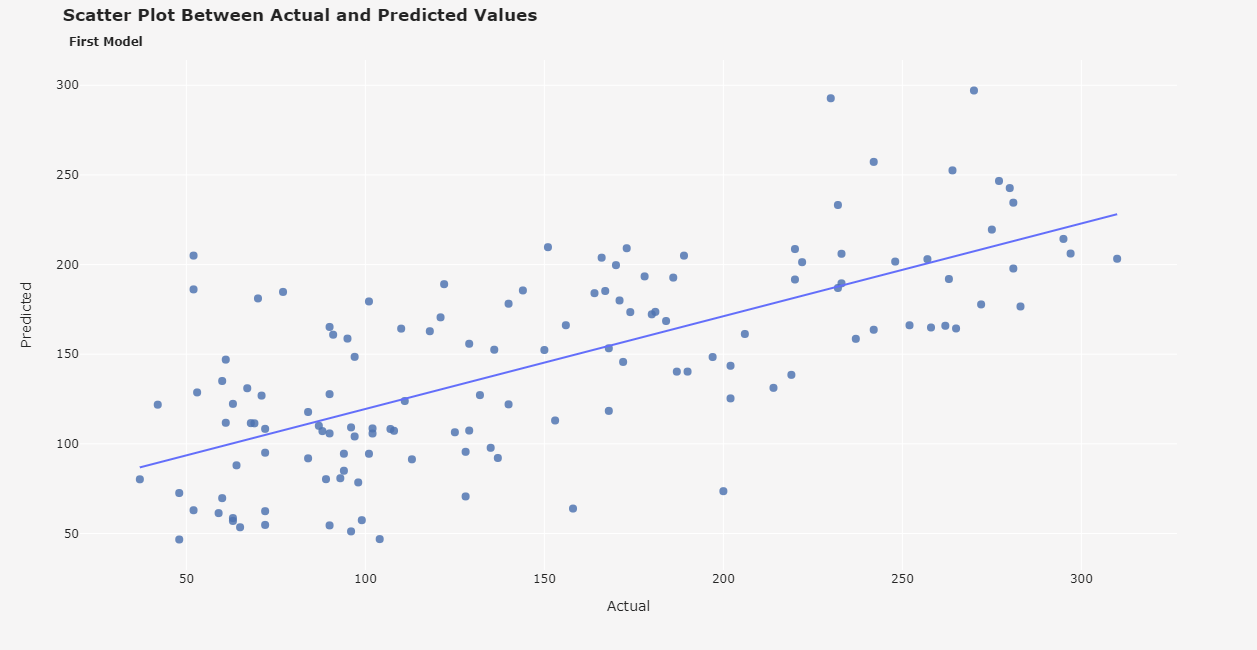

In [20]:
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # Creating Dataframe containing actual and predicted values

fig = px.scatter(plot_df, x='Actual', y='Predicted', opacity=0.825, template='seaborn') # Creating scatterplot
fig.add_traces(px.scatter(plot_df, x='Actual', y='Predicted', trendline="ols").data[1]) # Obtaining the fit line

fig.update_traces(marker={'size': 8})

fig.update_layout(title={'text': f'<b>Scatter Plot Between Actual and Predicted Values <br> <sub>First Model</sub></b>',
                         'x': 0.05, 'xanchor': 'left', 'y': 0.968},
                  showlegend=True,
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=650, width=850)
                
fig.show()

<p style="font-size: 22px;
          font-family: Monaco">We can take the first model above as a <mark>baseline</mark>. Below, we can try changing our data to see if we can improve performance.</p>
<p style="font-size: 22px;
          font-family: Monaco">Even though <code>Feature_2</code> was deemed relevant in the summary above, I want to test how well we perform without it. I want to remove this feature due to its low Pearson's R value when we checked its correlation with the target variable. I'm also going to remove <code>Feature_6</code> due to its high correlation with <code>Feature_5</code> and its lower correlation to the target variable.</p>

In [21]:
# Selecting feature to remove
features_to_remove = ['Feature_2',
                     'Feature_6']

# Removing them
new_X_train = X_train.drop(features_to_remove, axis =1)
new_X_test = X_test.drop(features_to_remove, axis =1)

In [22]:
new_X_train # Visualizing new X dataframe

,const,Feature_1,Feature_3,Feature_4,Feature_5,Feature_7,Feature_8,Feature_9,Feature_10
225,1.0,0.030811,0.032595,0.049415,-0.040096,-0.069172,0.034309,0.063015,0.003064
412,1.0,0.074401,0.085408,0.063187,0.014942,0.015505,-0.002592,0.006207,0.085907
118,1.0,-0.056370,-0.010517,0.025315,0.023198,-0.039719,0.034309,0.020609,0.056912
114,1.0,0.023546,0.110198,0.063187,0.013567,-0.024993,0.020655,0.099241,0.023775
364,1.0,0.001751,-0.006206,-0.019442,-0.009825,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...
106,1.0,-0.096328,-0.076264,-0.043542,-0.045599,0.008142,-0.039493,-0.059471,-0.083920
270,1.0,0.005383,0.030440,0.083844,-0.037344,0.015505,-0.039493,0.008641,0.015491
348,1.0,0.030811,-0.020218,-0.005670,-0.004321,0.078093,-0.039493,-0.010903,-0.001078
435,1.0,-0.012780,-0.023451,-0.040099,-0.016704,-0.017629,-0.002592,-0.038460,-0.038357


In [23]:
# Fitting model
model = sm.OLS(y_train, new_X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     37.75
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.19e-41
Time:                        14:33:10   Log-Likelihood:                -1678.7
No. Observations:                 309   AIC:                             3375.
Df Residuals:                     300   BIC:                             3409.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.8524      3.206     47.060      0.0

<p style="font-size: 22px;
          font-family: Monaco">We can start it out by noticing that R-Squared, at 0.502, is lower than the previous one. This may indicate that this model is able to explain a lesser percentage of the variance in $Y$ than the previous model.</p>
<p style="font-size: 22px;
          font-family: Monaco">We may also use the <b>Log-Likelihood</b>, <b>AIC</b>, and <b>BIC</b> metrics to compare both models. Overall, a Log-Likelihood closer to 0 and lower AIC and BIC values are preferred. In this case, this model performs worse than the previous model, although not by much.</p>
<p style="font-size: 22px;
          font-family: Monaco">Values for Kurtosis, Skew, and the Durbin-Watson statistic also place the distribution of residuals in this case a bit further from the normal distribution compared to the previous model.</p>
<p style="font-size: 22px;
          font-family: Monaco">Let's predict on the testing set to find out how this model performs.</p>

In [24]:
y_pred = model.predict(new_X_test)
rmse = mean_squared_error(y_test, y_pred,squared = False)

print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 53.64


<p style="font-size: 22px;
          font-family: Monaco">We have a slighlty <b>worse</b> performance compared to the first model, with a Root Mean Squared Error sligthly larger than the first one.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">We can once again plot a scatter plot displaying the difference data points for actual and predicted values.</p>

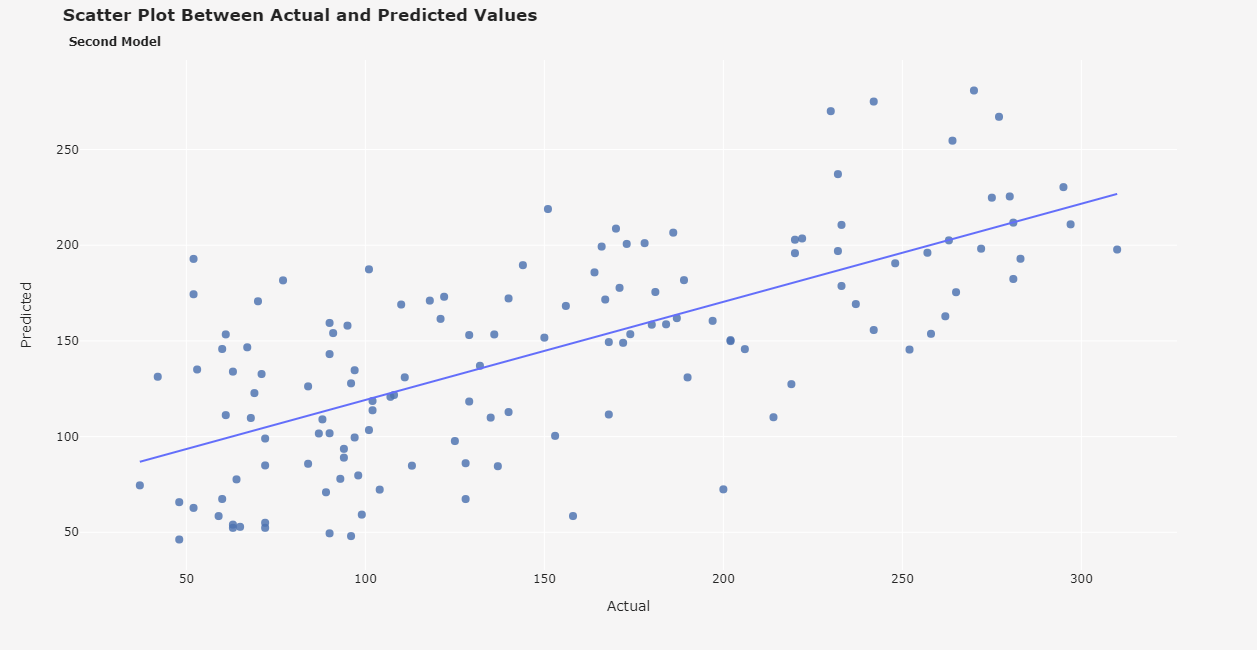

In [25]:
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

fig = px.scatter(plot_df, x='Actual', y='Predicted', opacity=0.825, template='seaborn')
fig.add_traces(px.scatter(plot_df, x='Actual', y='Predicted', trendline="ols").data[1])

fig.update_traces(marker={'size': 8})

fig.update_layout(title={'text': f'<b>Scatter Plot Between Actual and Predicted Values <br> <sub>Second Model</sub></b>',
                         'x': 0.05, 'xanchor': 'left', 'y': 0.968},
                  showlegend=True,
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=650, width=850)
                
fig.show()

<p style="font-size: 22px;
          font-family: Monaco">The second model, then, performed slightly worse than the first one, although the changes weren't really drastic.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">Let's go back to the inferences we made when analyzing the $P>|t|$ values for the independent variables of the first model. We could observe that features with larger p-values, such as <code>Feature_7</code> with 0.622, were deemed not very statistically significant. In the cell below, we are going to select all these features with high $p-values$ and remove them from our $X$ sets. </p>

In [26]:
# Selecting feature to remove
features_to_remove = ['Feature_1',
                     'Feature_5',
                     'Feature_6',
                     'Feature_7',
                     'Feature_8',
                     'Feature_10']

# Removing features
new_X_train = X_train.drop(features_to_remove, axis =1)
new_X_test = X_test.drop(features_to_remove, axis =1)

In [27]:
new_X_train # visualizing results

,const,Feature_2,Feature_3,Feature_4,Feature_9
225,1.0,0.050680,0.032595,0.049415,0.063015
412,1.0,-0.044642,0.085408,0.063187,0.006207
118,1.0,0.050680,-0.010517,0.025315,0.020609
114,1.0,-0.044642,0.110198,0.063187,0.099241
364,1.0,0.050680,-0.006206,-0.019442,0.014821
...,...,...,...,...,...
106,1.0,-0.044642,-0.076264,-0.043542,-0.059471
270,1.0,0.050680,0.030440,0.083844,0.008641
348,1.0,-0.044642,-0.020218,-0.005670,-0.010903
435,1.0,-0.044642,-0.023451,-0.040099,-0.038460


<p style="font-size: 22px;
          font-family: Monaco">We now have a more compact $X$ sets with 4 features plus the constant.</p>

In [28]:
# Fitting model
model = sm.OLS(y_train, new_X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     70.44
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.76e-42
Time:                        14:33:10   Log-Likelihood:                -1685.0
No. Observations:                 309   AIC:                             3380.
Df Residuals:                     304   BIC:                             3399.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.7472      3.246     46.439      0.0

<p style="font-size: 22px;
          font-family: Monaco">Compared to the first model, we once more have inferior values for the Log-Likelihood and AIC. For the BIC, however, in this case we have a lower value, considered better than the more slightly higher value of the first model.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">This model also has a lower R-Squared, explaining 48.1% of the variance of the target variable, a bit lower than that of the first model.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">When looking at the independent variables, it seems that all are statistically significant, given that $P>|t|$ are below 0.05. <code>Feature_2</code> is the only one that is slightly above that threshold and it's also the only one with a negative coefficient.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">It's also noticeable that the Jarque-Bera statistic indicate that residuals may not be normally-distributed. Let's plot the distribution to see how it is shaped.</p>

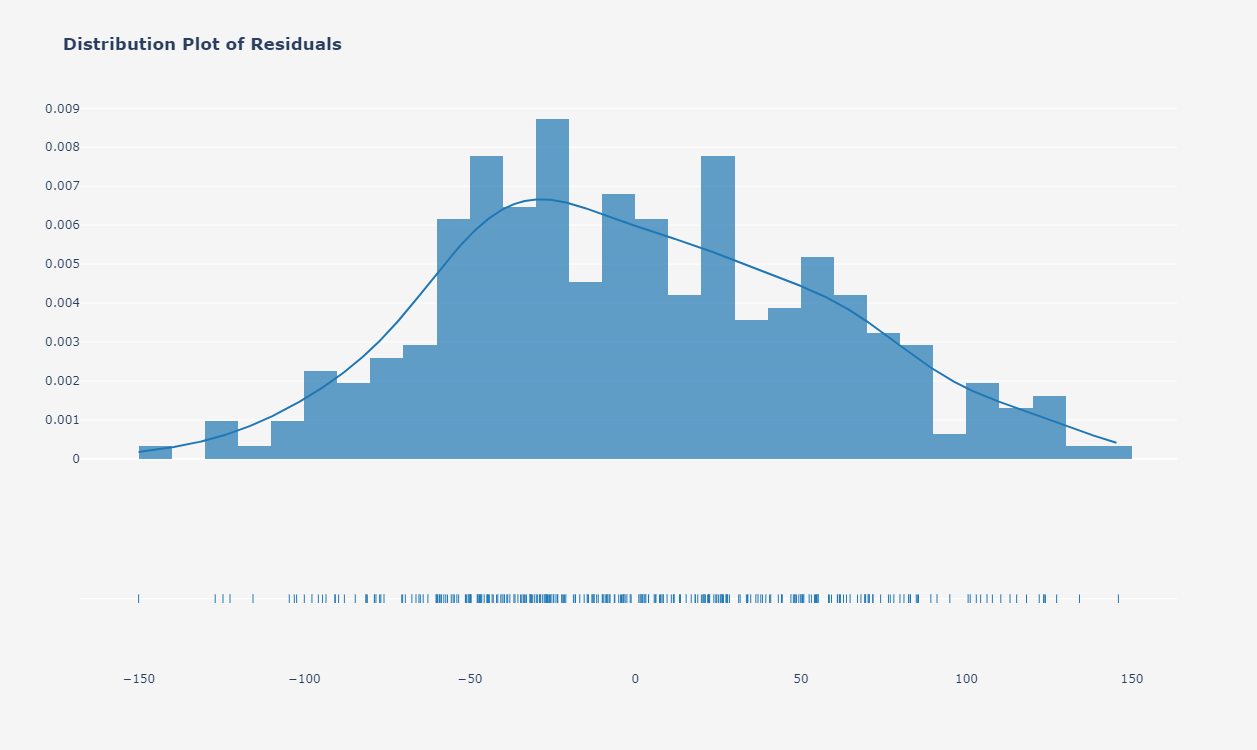

In [29]:
residuals = model.resid # Obtaining residuals

fig = ff.create_distplot([residuals], ['Residuals'], bin_size=10)
fig.update_layout(title={'text': '<b>Distribution Plot of Residuals</b>',
                         'x': 0.05, 'xanchor': 'left'},
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=750, width=950,
                  showlegend=False)

fig.show()

<p style="font-size: 22px;
          font-family: Monaco">The curve doesn't really resemble a bell curve, which suggests the non normality of the distribution of residuals in this case.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">Let's predict the $Y$ values on the testing set to see how the Root Mean Squared Error compares to the former models.</p>

In [30]:
y_pred = model.predict(new_X_test)
rmse = mean_squared_error(y_test, y_pred,squared = False)

print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 52.68


<p style="font-size: 22px;
          font-family: Monaco">This model achieves a better RMSE score, by scoring a value lower than the other two models. We can also plot the scatter plot between actual and predicted values.</p>

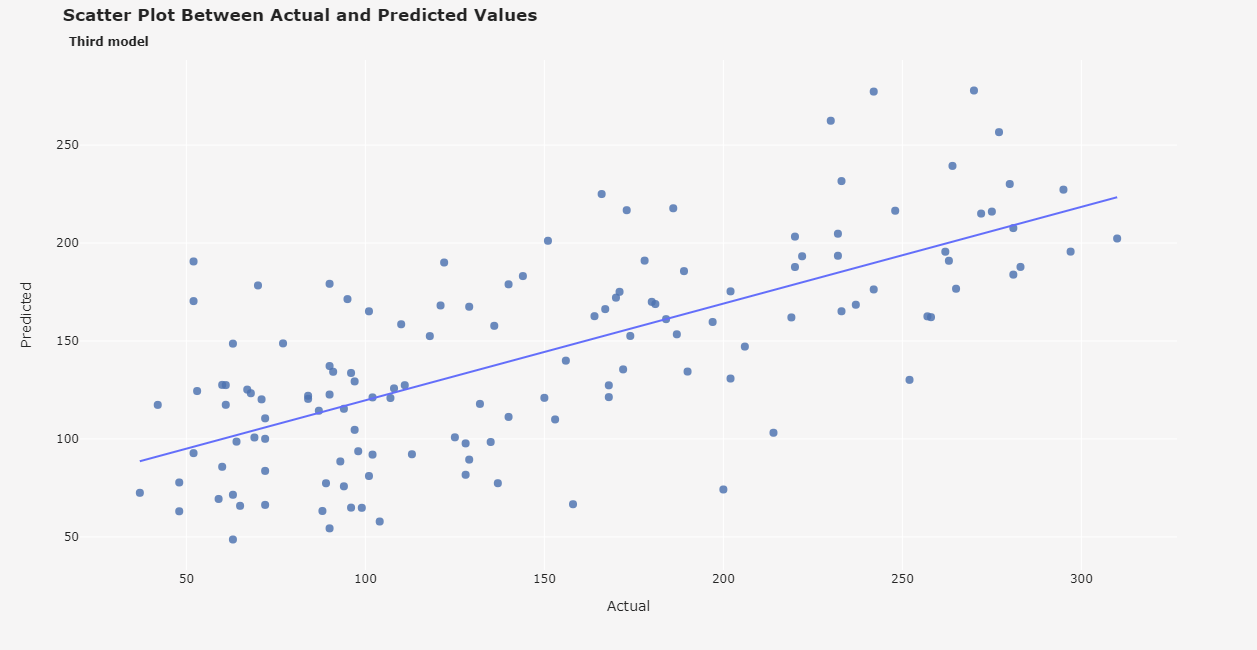

In [31]:
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

fig = px.scatter(plot_df, x='Actual', y='Predicted', opacity=0.825, template='seaborn')
fig.add_traces(px.scatter(plot_df, x='Actual', y='Predicted', trendline="ols").data[1])

fig.update_traces(marker={'size': 8})

fig.update_layout(title={'text': f'<b>Scatter Plot Between Actual and Predicted Values <br> <sub>Third model</sub></b>',
                         'x': 0.05, 'xanchor': 'left', 'y': 0.968},
                  showlegend=True,
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=650, width=850)
                
fig.show()

<p style="font-size: 22px;
          font-family: Monaco">The third model generalized better to the testing set than the other models. However, according to the metrics, it seems like the first model may best meet the assumptions of linear regression, providing a more trustworthy estimates and predictions.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">It is still relevant to point out that all three models are statistically significant, according to the <mark><b>F-Statistic</b></mark> and their very low <mark><b>Prob (F-statistic)</b></mark> values, indicating that our independent variables $X_s$ are indeed useful for predicting the values of $Y$.</p>

<h1 id = 'conclusion' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">✍🏻 Conclusion</h1>

<p style="font-size: 22px;
          font-family: Monaco">In this notebook, we've taken a deep dive into key concepts of Linear Regression, exploring its mathematical foundations, assumptions, and practical applications. We've worked with the Sklearn's diabetes dataset to fit multiple models, each with its own set of features, and evaluated their performance on a hold-out testing set using metrics like Root Mean Squared Error, as well as other statistical significance metrics.</p>
          
<p style="font-size: 22px;
          font-family: Monaco">While the first model seemed to best meet the assumptions of linear regression, which might translate into more trustworthy estimates, the third model ended up generalizing better to the hold-out set, achieving the lowest Root Mean Squared Error score.</p>

<p style="font-size: 22px;
          font-family: Monaco">Additional tests could further elucidate the generalization capabilities of these models. Cross-validation, for instance, could be highly effective in this context. And this is where I leave my call to action for you, the reader: pick up where I left off and run your own tests. After all, <b>science thrives on collaboration and the collective refinement of our findings</b>.</p>

<p style="font-size: 22px;
          font-family: Monaco">If you liked this notebook, make sure to leave your upvote. Also, engage in the comment section by leaving your suggestions and insights. These are all great incentives to keep going and publishing these notebooks. 😊</p>

<p style="font-size: 22px;
          font-family: Monaco">Thank you so much for your support!</p>

<h1 id = 'sources' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">📚 Further Reading...</h1>

<p style="font-size: 22px;
          font-family: Monaco">During the analyses of the different models, I have mentioned several metrics that I didn't cover with that much extension. For this reason, I am leaving below a number of sources where you can read more about them.</p>
          
- <p style="font-size: 22px;
          font-family: Monaco">
    <b>F-Statistic:</b></p>
    
    - <p style="font-size: 22px;
              font-family: Monaco">
        <a href = "https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/">F Statistic / F Value: Simple Definition and Interpretation</a></p>
    - <p style="font-size: 22px;
              font-family: Monaco">
        <a href = "https://www.statology.org/a-simple-guide-to-understanding-the-f-test-of-overall-significance-in-regression/">A Simple Guide to Understanding the F-Test of Overall Significance in Regression</a></p>

    
- <p style="font-size: 22px;
          font-family: Monaco">
    <b>Log-Likelihood:</b></p>
    
    - <p style="font-size: 22px;
              font-family: Monaco">
         <a href = "https://www.statisticshowto.com/log-likelihood-function/">Log Likelihood Function</a></p>
    - <p style="font-size: 22px;
              font-family: Monaco">
         <a href = "https://www.statology.org/interpret-log-likelihood/">How to Interpret Log-Likelihood Values (With Examples)</a></p>
    
- <p style="font-size: 22px;
          font-family: Monaco">
    <b>Durbin Watson Test:</b></p>
    
    - <p style="font-size: 22px;
              font-family: Monaco">
         <a href = "https://www.investopedia.com/terms/d/durbin-watson-statistic.asp">Durbin Watson Test: What It Is in Statistics, With Examples</a></p>
    - <p style="font-size: 22px;
              font-family: Monaco">
         <a href = "https://medium.com/@analyttica/durbin-watson-test-fde429f79203">Understanding Durbin-Watson Test</a></p>

- <p style="font-size: 22px;
          font-family: Monaco">
    <b>Jarque-Bera Test:</b></p>
    
    - <p style="font-size: 22px;
              font-family: Monaco">
        <a href = "https://www.statisticshowto.com/jarque-bera-test/">Jarque-Bera Test</a></p>
    - <p style="font-size: 22px;
              font-family: Monaco">
        <a href = "https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test">Wikipedia: Jarque–Bera test</a></p>
    
- <p style="font-size: 22px;
          font-family: Monaco">
    <b>AIC (Akaike Information Criterion):</b></p>
    
    - <p style="font-size: 22px;
              font-family: Monaco">
        <a href = "https://www.statisticshowto.com/akaikes-information-criterion/">Akaike’s Information Criterion: Definition, Formulas</a></p>
    
    
- <p style="font-size: 22px;
          font-family: Monaco">
    <b>BIC (Bayesian Information Criterion):</b></p>
    
    - <p style="font-size: 22px;
                  font-family: Monaco"><a href = "https://www.statisticshowto.com/bayesian-information-criterion/">Bayesian Information Criterion (BIC) / Schwarz Criterion</a></p>
    
    
- <p style="font-size: 22px;
          font-family: Monaco">
    <b>R-Squared:</b></p>
    
    - <p style="font-size: 22px;
                  font-family: Monaco">
            <a href = "https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/">Coefficient of Determination (R Squared): Definition, Calculation
        </a></p>

<br><br><br>

<p style="font-size: 20px;
          font-family: Monaco">
    <i>Stay curious!</i></p>

#### <hr style="border: 0; height: 1px; border-top: 0.85px solid #b2b2b2">
<div style="text-align: left; color: #8d8d8d; padding-left: 15px; font-size: 14.25px;">
    Luis Fernando Torres, 2023 <br><br>
    Let's connect!🔗<br>
    <a href="https://www.linkedin.com/in/luuisotorres/">LinkedIn</a> • <a href="https://medium.com/@luuisotorres">Medium</a> • <a href = "https://huggingface.co/luisotorres">Hugging Face</a><br><br>
</div>